In [1]:
import os
from dotenv import load_dotenv
import re
import nltk
import json
import pandas as pd
from path import Path
%matplotlib inline
from pandas.io.json import json_normalize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
import nltk
nltk.download('omw-1.4')
import string
from string import punctuation
import re

from collections import Counter
from nltk import ngrams
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
import pandas as pd
lemmatizer = WordNetLemmatizer()

from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

import spacy
from spacy import displacy
from pprint import pprint


[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/ameerirfan/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


# HEADLINES SENTIMENT ANALYSIS

In [2]:
load_dotenv()

True

In [3]:
from newsapi import NewsApiClient
api_key = os.getenv("NEWSAPI_KEY")

In [4]:
newsapi = NewsApiClient(api_key=api_key)

In [5]:
btc_headlines = newsapi.get_everything(q='bitcoin',
                                        language="en",
                                       sort_by="relevancy")

with open('btc.json', 'w') as json_file:
    json.dump(btc_headlines, json_file)

In [6]:
eth_headlines = newsapi.get_everything(q='ethereum',
                                        language="en",
                                        page_size=100,
                                        sort_by="relevancy")

with open('eth.json', 'w') as json_file:
    json.dump(eth_headlines, json_file)

In [7]:
btc_news = pd.read_json ('/Users/ameerirfan/Desktop/FT-BTC-Activities/FT-BTC_Unit_12/btc.json')

df_btc = json_normalize(btc_news['articles'])

df_btc = df_btc.drop(['author', 'title', 'url','urlToImage','publishedAt','content','source.id','source.name'], axis=1)

sentiment_title = df_btc.apply(lambda x : analyzer.polarity_scores(x['description']), axis=1)

df_btc['Comp'] =sentiment_title.apply(lambda x : x.get('compound') )
df_btc['Pos'] =sentiment_title.apply(lambda x : x.get('pos') )
df_btc['Neu'] =sentiment_title.apply(lambda x : x.get('neu') )
df_btc['Neg'] =sentiment_title.apply(lambda x : x.get('neg') )
df_btc

/var/folders/n4/gpv7p5n93k529lgh_r2dcw4h0000gn/T/ipykernel_51724/4013532603.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  df_btc = json_normalize(btc_news['articles'])


description    Comp    Pos    Neu  \
0   Compass Mining grew quickly during crypto’s ha... -0.2500  0.000  0.900   
1   Roman Sterlingov, accused of laundering $336 m... -0.1531  0.095  0.774   
2   You gotta hand it to some people for being imp...  0.2960  0.142  0.739   
3   One of the most influential cryptocurrency pro...  0.4927  0.197  0.803   
4   <ol><li>Tesla Sells 75% of its Bitcoin Holding... -0.2960  0.000  0.944   
..                                                ...     ...    ...    ...   
95  The biggest story in tech right now is that so...  0.0000  0.000  1.000   
96  Second-quarter GDP data is due Thursday, and i... -0.4215  0.000  0.833   
97  Nearly $1 billion has been lost to crypto heis... -0.3182  0.000  0.909   
98  The S&P 500 was on course to break two straigh... -0.2023  0.092  0.777   
99  The Snapchat owner's earnings miss cast cold w... -0.0516  0.101  0.755   

      Neg  
0   0.100  
1   0.131  
2   0.119  
3   0.000  
4   0.056  
..    ...  
95  0.000  
96  0.167  
97  0.091  
98  0.131  
99  0.144  

[100 rows x 5 columns]

In [8]:
eth_news = pd.read_json ('/Users/ameerirfan/Desktop/FT-BTC-Activities/FT-BTC_Unit_12/eth.json')

df_eth = json_normalize(eth_news['articles'])

df_eth = df_eth.drop(['author', 'title', 'url','urlToImage','publishedAt','content','source.id','source.name'], axis=1)

sentiment_title = df_eth.apply(lambda x : analyzer.polarity_scores(x['description']), axis=1)

df_eth['Comp'] =sentiment_title.apply(lambda x : x.get('compound') )
df_eth['Pos'] =sentiment_title.apply(lambda x : x.get('pos') )
df_eth['Neu'] =sentiment_title.apply(lambda x : x.get('neu') )
df_eth['Neg'] =sentiment_title.apply(lambda x : x.get('neg') )
df_eth

/var/folders/n4/gpv7p5n93k529lgh_r2dcw4h0000gn/T/ipykernel_51724/611648950.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  df_eth = json_normalize(eth_news['articles'])


description    Comp    Pos    Neu  \
0   One of the most influential cryptocurrency pro...  0.4927  0.197  0.803   
1   The non-fungible token\r\n (NFT) market has fa... -0.0217  0.040  0.918   
2   It's a day of the week ending in the letter "y...  0.1779  0.104  0.807   
3   Less than two weeks into its soft launch, Game...  0.2023  0.085  0.826   
4   Ethereum will soon adopt a proof-of-stake syst...  0.1779  0.096  0.904   
..                                                ...     ...    ...    ...   
95  Bitcoin and Ethereum are uniquely positioned t...  0.0000  0.000  1.000   
96  The upcoming Ethereum merge could be a bigger ...  0.0000  0.000  1.000   
97  Ethereum has been surging lately, but is it sa...  0.5927  0.243  0.757   
98  Ethereum is up nearly 50% this month -- but it...  0.0000  0.000  1.000   
99  Ethereum has nearly doubled in two months, but...  0.0000  0.000  1.000   

      Neg  
0   0.000  
1   0.042  
2   0.089  
3   0.089  
4   0.000  
..    ...  
95  0.000  
96  0.000  
97  0.000  
98  0.000  
99  0.000  

[100 rows x 5 columns]

In [9]:
df_btc.describe()

Comp        Pos         Neu         Neg
count  100.000000  100.00000  100.000000  100.000000
mean    -0.055689    0.06163    0.856780    0.081630
std      0.424965    0.07055    0.101333    0.092312
min     -0.908100    0.00000    0.614000    0.000000
25%     -0.331825    0.00000    0.776250    0.000000
50%      0.000000    0.05200    0.853500    0.056000
75%      0.301550    0.10225    0.944000    0.140250
max      0.885800    0.28900    1.000000    0.361000

In [10]:
df_eth.describe()

Comp        Pos         Neu         Neg
count  100.000000  100.00000  100.000000  100.000000
mean     0.024138    0.05957    0.877010    0.053430
std      0.384940    0.07772    0.139531    0.086174
min     -0.862200    0.00000    0.000000    0.000000
25%     -0.109025    0.00000    0.792000    0.000000
50%      0.000000    0.00000    0.895500    0.000000
75%      0.250000    0.10150    1.000000    0.090000
max      0.900100    0.28800    1.000000    0.376000

# Questions:
## Q: Which coin had the highest mean positive score?

#### A:The CryptoCoin with the highest mean positve score would be ETHERIUM (ETH) with a postive mean score of 0.060470

## Q: Which coin had the highest negative score?

#### A:The CryptoCoin with the highest negative score would be ETHERIUM (ETH) with a MAX negative score of 0.376000 

## Q. Which coin had the highest positive score?

#### A:The CryptoCoin with the highest mean positve score would be BITCOIN (BTC) with a MAX postive score of 0.289000

# TOKENISER

In [11]:
lemmatizer = WordNetLemmatizer()

In [12]:
def tokeniser(text):
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    tokens = word_tokenize(re_clean)
    tokens = [t.lower() for t in tokens] 
    words = [t.translate(str.maketrans('','',string.punctuation)) for t in tokens]   
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if not w in stop_words]  
    tokens = ', '.join([lemmatizer.lemmatize(word) for word in words])
    return tokens

In [13]:
df_btc['tokens'] = df_btc.apply(lambda x : tokeniser(x['description']), axis=1)
df_btc

description    Comp    Pos    Neu  \
0   Compass Mining grew quickly during crypto’s ha... -0.2500  0.000  0.900   
1   Roman Sterlingov, accused of laundering $336 m... -0.1531  0.095  0.774   
2   You gotta hand it to some people for being imp...  0.2960  0.142  0.739   
3   One of the most influential cryptocurrency pro...  0.4927  0.197  0.803   
4   <ol><li>Tesla Sells 75% of its Bitcoin Holding... -0.2960  0.000  0.944   
..                                                ...     ...    ...    ...   
95  The biggest story in tech right now is that so...  0.0000  0.000  1.000   
96  Second-quarter GDP data is due Thursday, and i... -0.4215  0.000  0.833   
97  Nearly $1 billion has been lost to crypto heis... -0.3182  0.000  0.909   
98  The S&P 500 was on course to break two straigh... -0.2023  0.092  0.777   
99  The Snapchat owner's earnings miss cast cold w... -0.0516  0.101  0.755   

      Neg                                             tokens  
0   0.100  compass, mining, grew, quickly, cryptos, halcy...  
1   0.131  roman, sterlingov, accused, laundering, millio...  
2   0.119  got, ta, hand, people, impetuous, even, face, ...  
3   0.000  one, influential, cryptocurrency, project, set...  
4   0.056  ollitesla, sell, bitcoin, holding, elon, musk,...  
..    ...                                                ...  
95  0.000  biggest, story, tech, right, venture, capitali...  
96  0.167  secondquarter, gdp, data, due, thursday, inves...  
97  0.091  nearly, billion, lost, crypto, heist, targetin...  
98  0.131  sp, course, break, two, straight, session, los...  
99  0.144  snapchat, owner, earnings, miss, cast, cold, w...  

[100 rows x 6 columns]

In [14]:
df_eth['tokens'] = df_eth.apply(lambda x : tokeniser(x['description']), axis=1)
df_eth

description    Comp    Pos    Neu  \
0   One of the most influential cryptocurrency pro...  0.4927  0.197  0.803   
1   The non-fungible token\r\n (NFT) market has fa... -0.0217  0.040  0.918   
2   It's a day of the week ending in the letter "y...  0.1779  0.104  0.807   
3   Less than two weeks into its soft launch, Game...  0.2023  0.085  0.826   
4   Ethereum will soon adopt a proof-of-stake syst...  0.1779  0.096  0.904   
..                                                ...     ...    ...    ...   
95  Bitcoin and Ethereum are uniquely positioned t...  0.0000  0.000  1.000   
96  The upcoming Ethereum merge could be a bigger ...  0.0000  0.000  1.000   
97  Ethereum has been surging lately, but is it sa...  0.5927  0.243  0.757   
98  Ethereum is up nearly 50% this month -- but it...  0.0000  0.000  1.000   
99  Ethereum has nearly doubled in two months, but...  0.0000  0.000  1.000   

      Neg                                             tokens  
0   0.000  one, influential, cryptocurrency, project, set...  
1   0.042  nonfungible, token, nft, market, fallen, cliff...  
2   0.089  day, week, ending, letter, inevitably, mean, t...  
3   0.089  le, two, week, soft, launch, gamestops, nft, m...  
4   0.000  ethereum, soon, adopt, proofofstake, system, s...  
..    ...                                                ...  
95  0.000  bitcoin, ethereum, uniquely, positioned, lead,...  
96  0.000  upcoming, ethereum, merge, could, bigger, cata...  
97  0.000     ethereum, surging, lately, safe, invest, right  
98  0.000              ethereum, nearly, month, even, upside  
99  0.000  ethereum, nearly, doubled, two, month, plenty,...  

[100 rows x 6 columns]

# NLTK / FREQUENCY ANALYSIS

In [15]:
def process_text(doc):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', doc)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return output

def bigram_counter(corpus): 
    big_string = ' '.join(corpus)
    processed = process_text(big_string)
    bigrams = ngrams(processed, n=2)
    top_10 = dict(Counter(bigrams).most_common(10))
    return pd.DataFrame(list(top_10.items()), columns=['bigram', 'count'])

def word_counter(corpus): 
    big_string = ' '.join(corpus)
    processed = process_text(big_string)
    top_10 = dict(Counter(processed).most_common(10))
    return pd.DataFrame(list(top_10.items()), columns=['word', 'count'])

In [16]:
corpus = df_btc["description"]
bigram_counter(corpus)

bigram  count
0          (hard, drive)      6
1       (reported, loss)      4
2       (digital, asset)      4
3       (james, howells)      4
4           (blog, post)      3
5      (second, quarter)      3
6             (bet, big)      3
7       (crypto, market)      3
8  (venture, capitalist)      3
9    (bitcoin, holdings)      2

In [17]:
corpus = df_eth["description"]
bigram_counter(corpus)

bigram  count
0  (ethereum, blockchain)      6
1      (mark, zuckerberg)      4
2        (crypto, market)      4
3      (nft, marketplace)      3
4       (called, falling)      3
5          (falling, man)      3
6  (proofofstake, system)      3
7         (tornado, cash)      3
8        (interest, rate)      3
9          (ethereum, ha)      3

In [18]:
def token_counter(tokens, N=10):
    big_string = ' '.join(tokens)
    processed = process_text(big_string)
    top = dict(Counter(processed).most_common(10))
    return pd.DataFrame(list(top.items()), columns=['word', 'count'])

In [19]:
tokens = df_btc["description"]
token_counter(tokens, N=10)

word  count
0         bitcoin     45
1          crypto     28
2              ha     21
3  cryptocurrency     17
4            year     14
5         company     11
6            loss     11
7              us     11
8          market     11
9           tesla     10

In [20]:
tokens = df_eth["description"]
token_counter(tokens, N=10)

word  count
0      crypto     28
1    ethereum     26
2          ha     15
3         nft     12
4  blockchain     12
5        said     10
6      market      8
7     bitcoin      8
8       merge      8
9    investor      8

# WORDCLOUDS

In [21]:
btc_corpus = df_btc['tokens'].str.cat(sep=', ')
eth_corpus = df_eth['tokens'].str.cat(sep=', ')

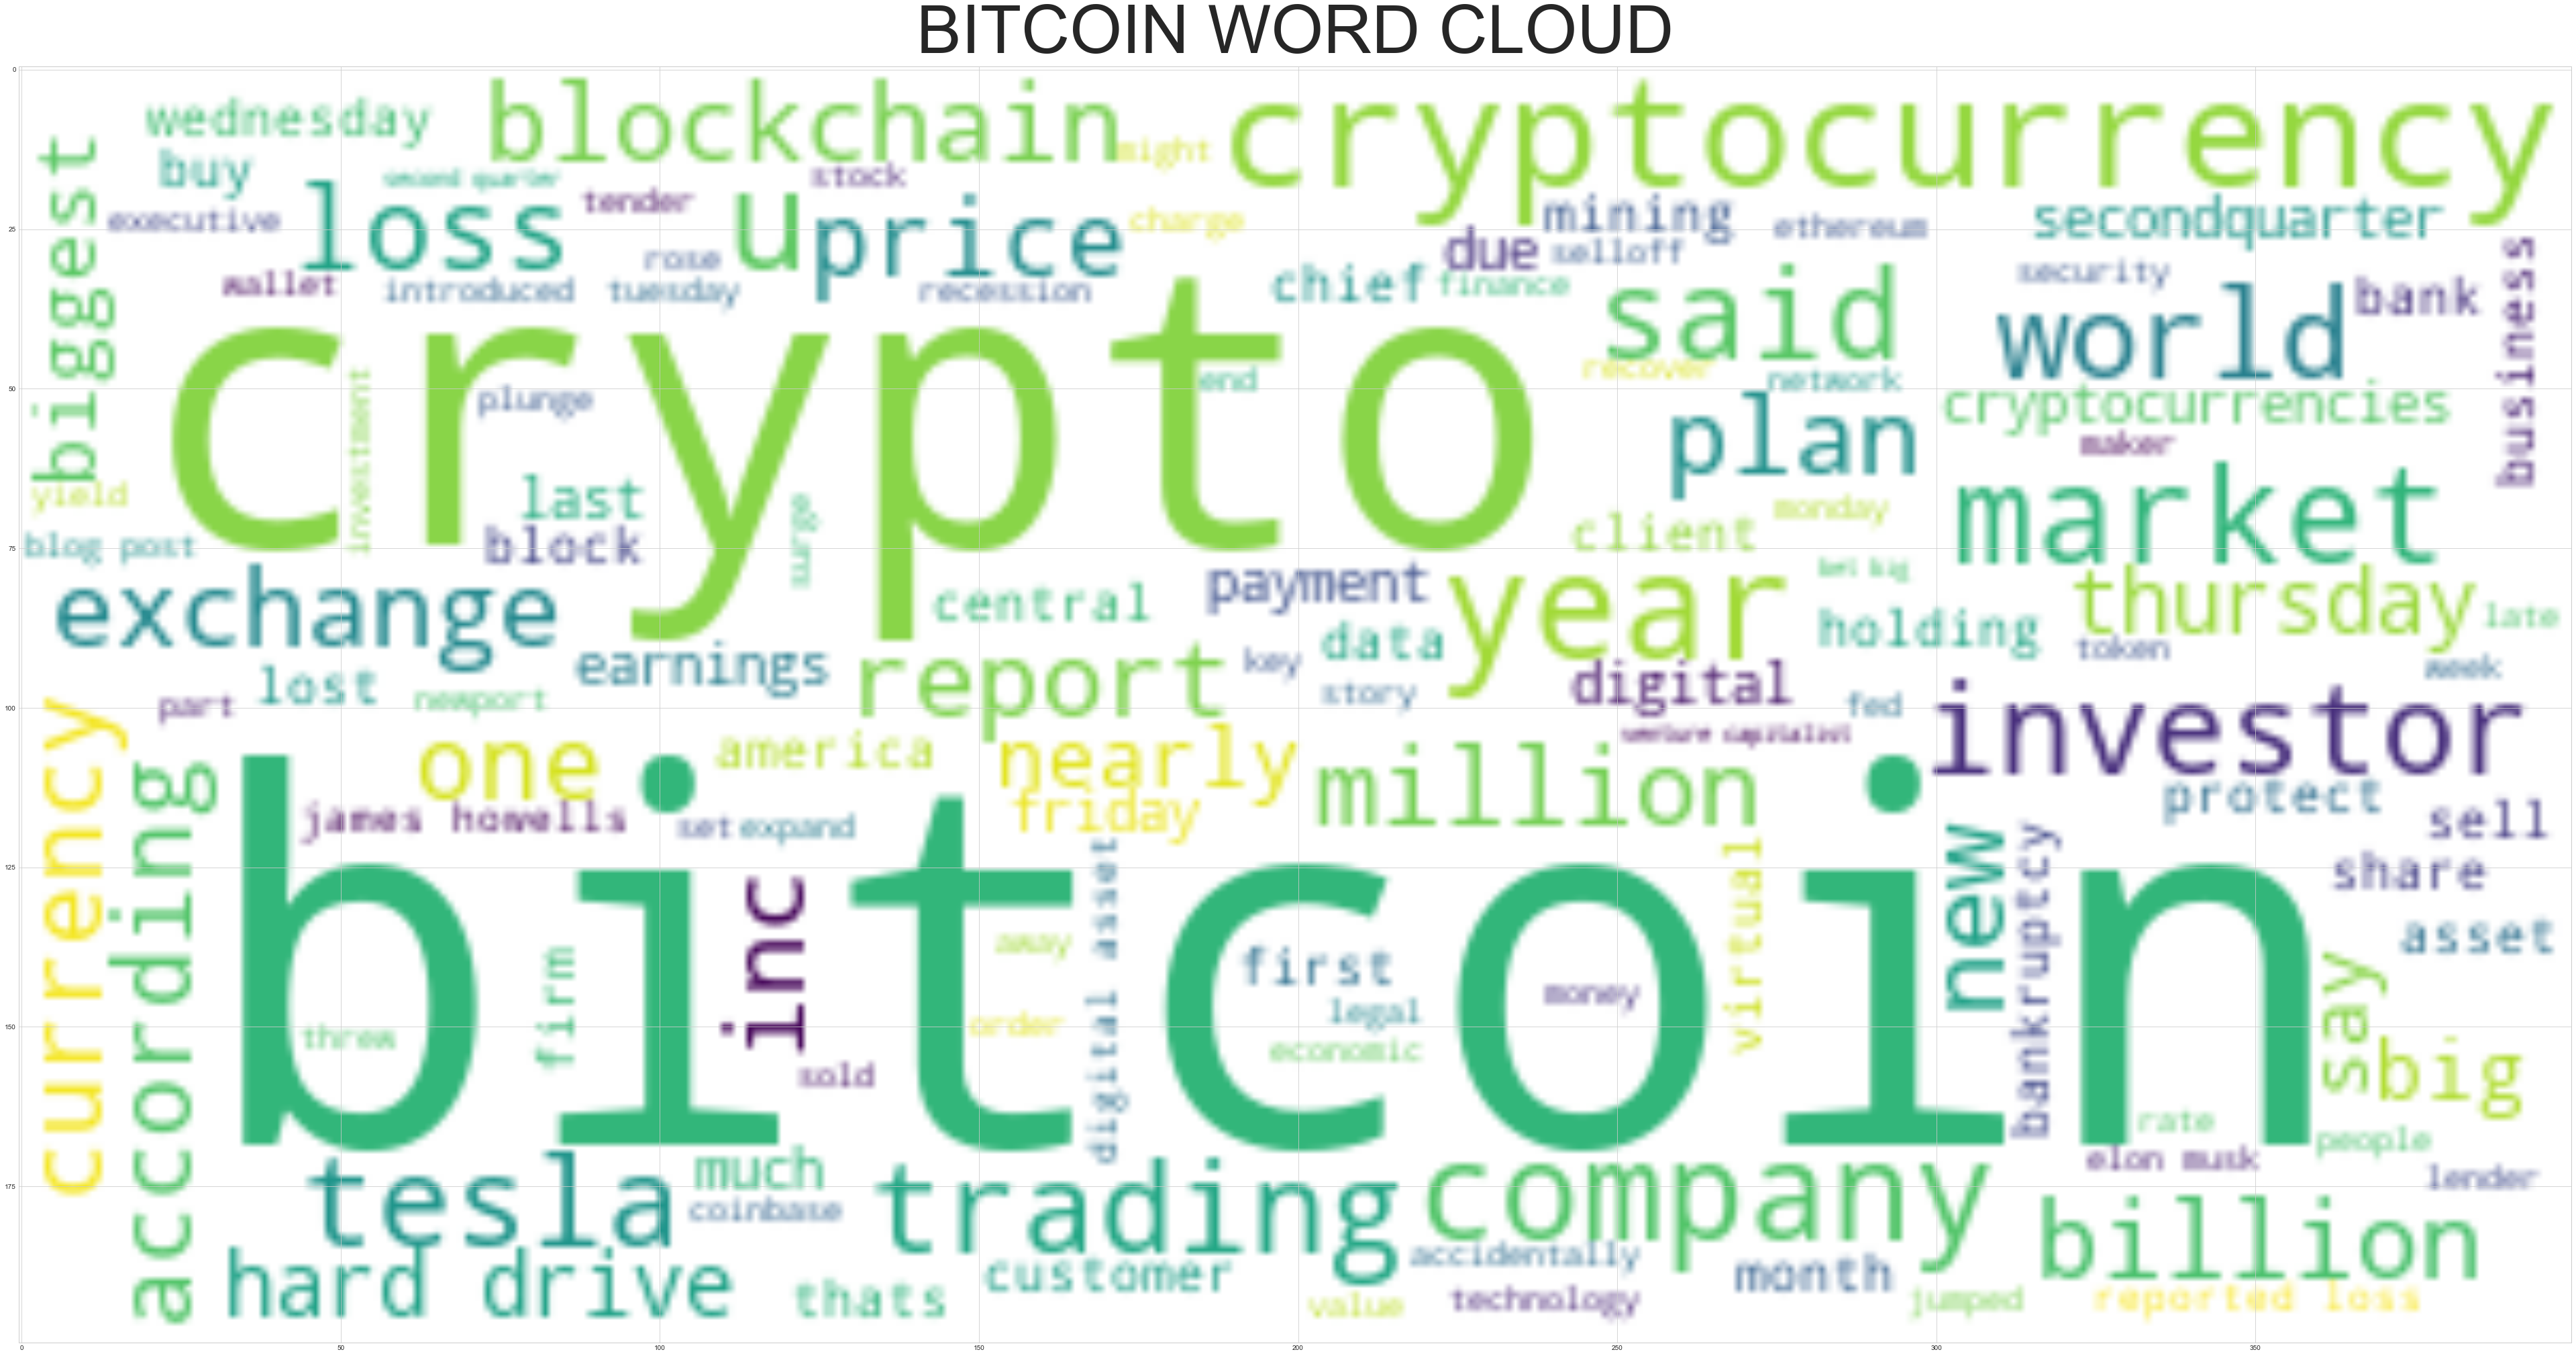

In [22]:
WCloud = WordCloud(background_color="white", max_words=200)
WCloud.generate(btc_corpus)
f = plt.figure(figsize=(150,150))
f.add_subplot(1,2, 2)
plt.imshow(WCloud, interpolation='bilinear')
plt.title("BITCOIN WORD CLOUD",fontsize=100)
plt.show()

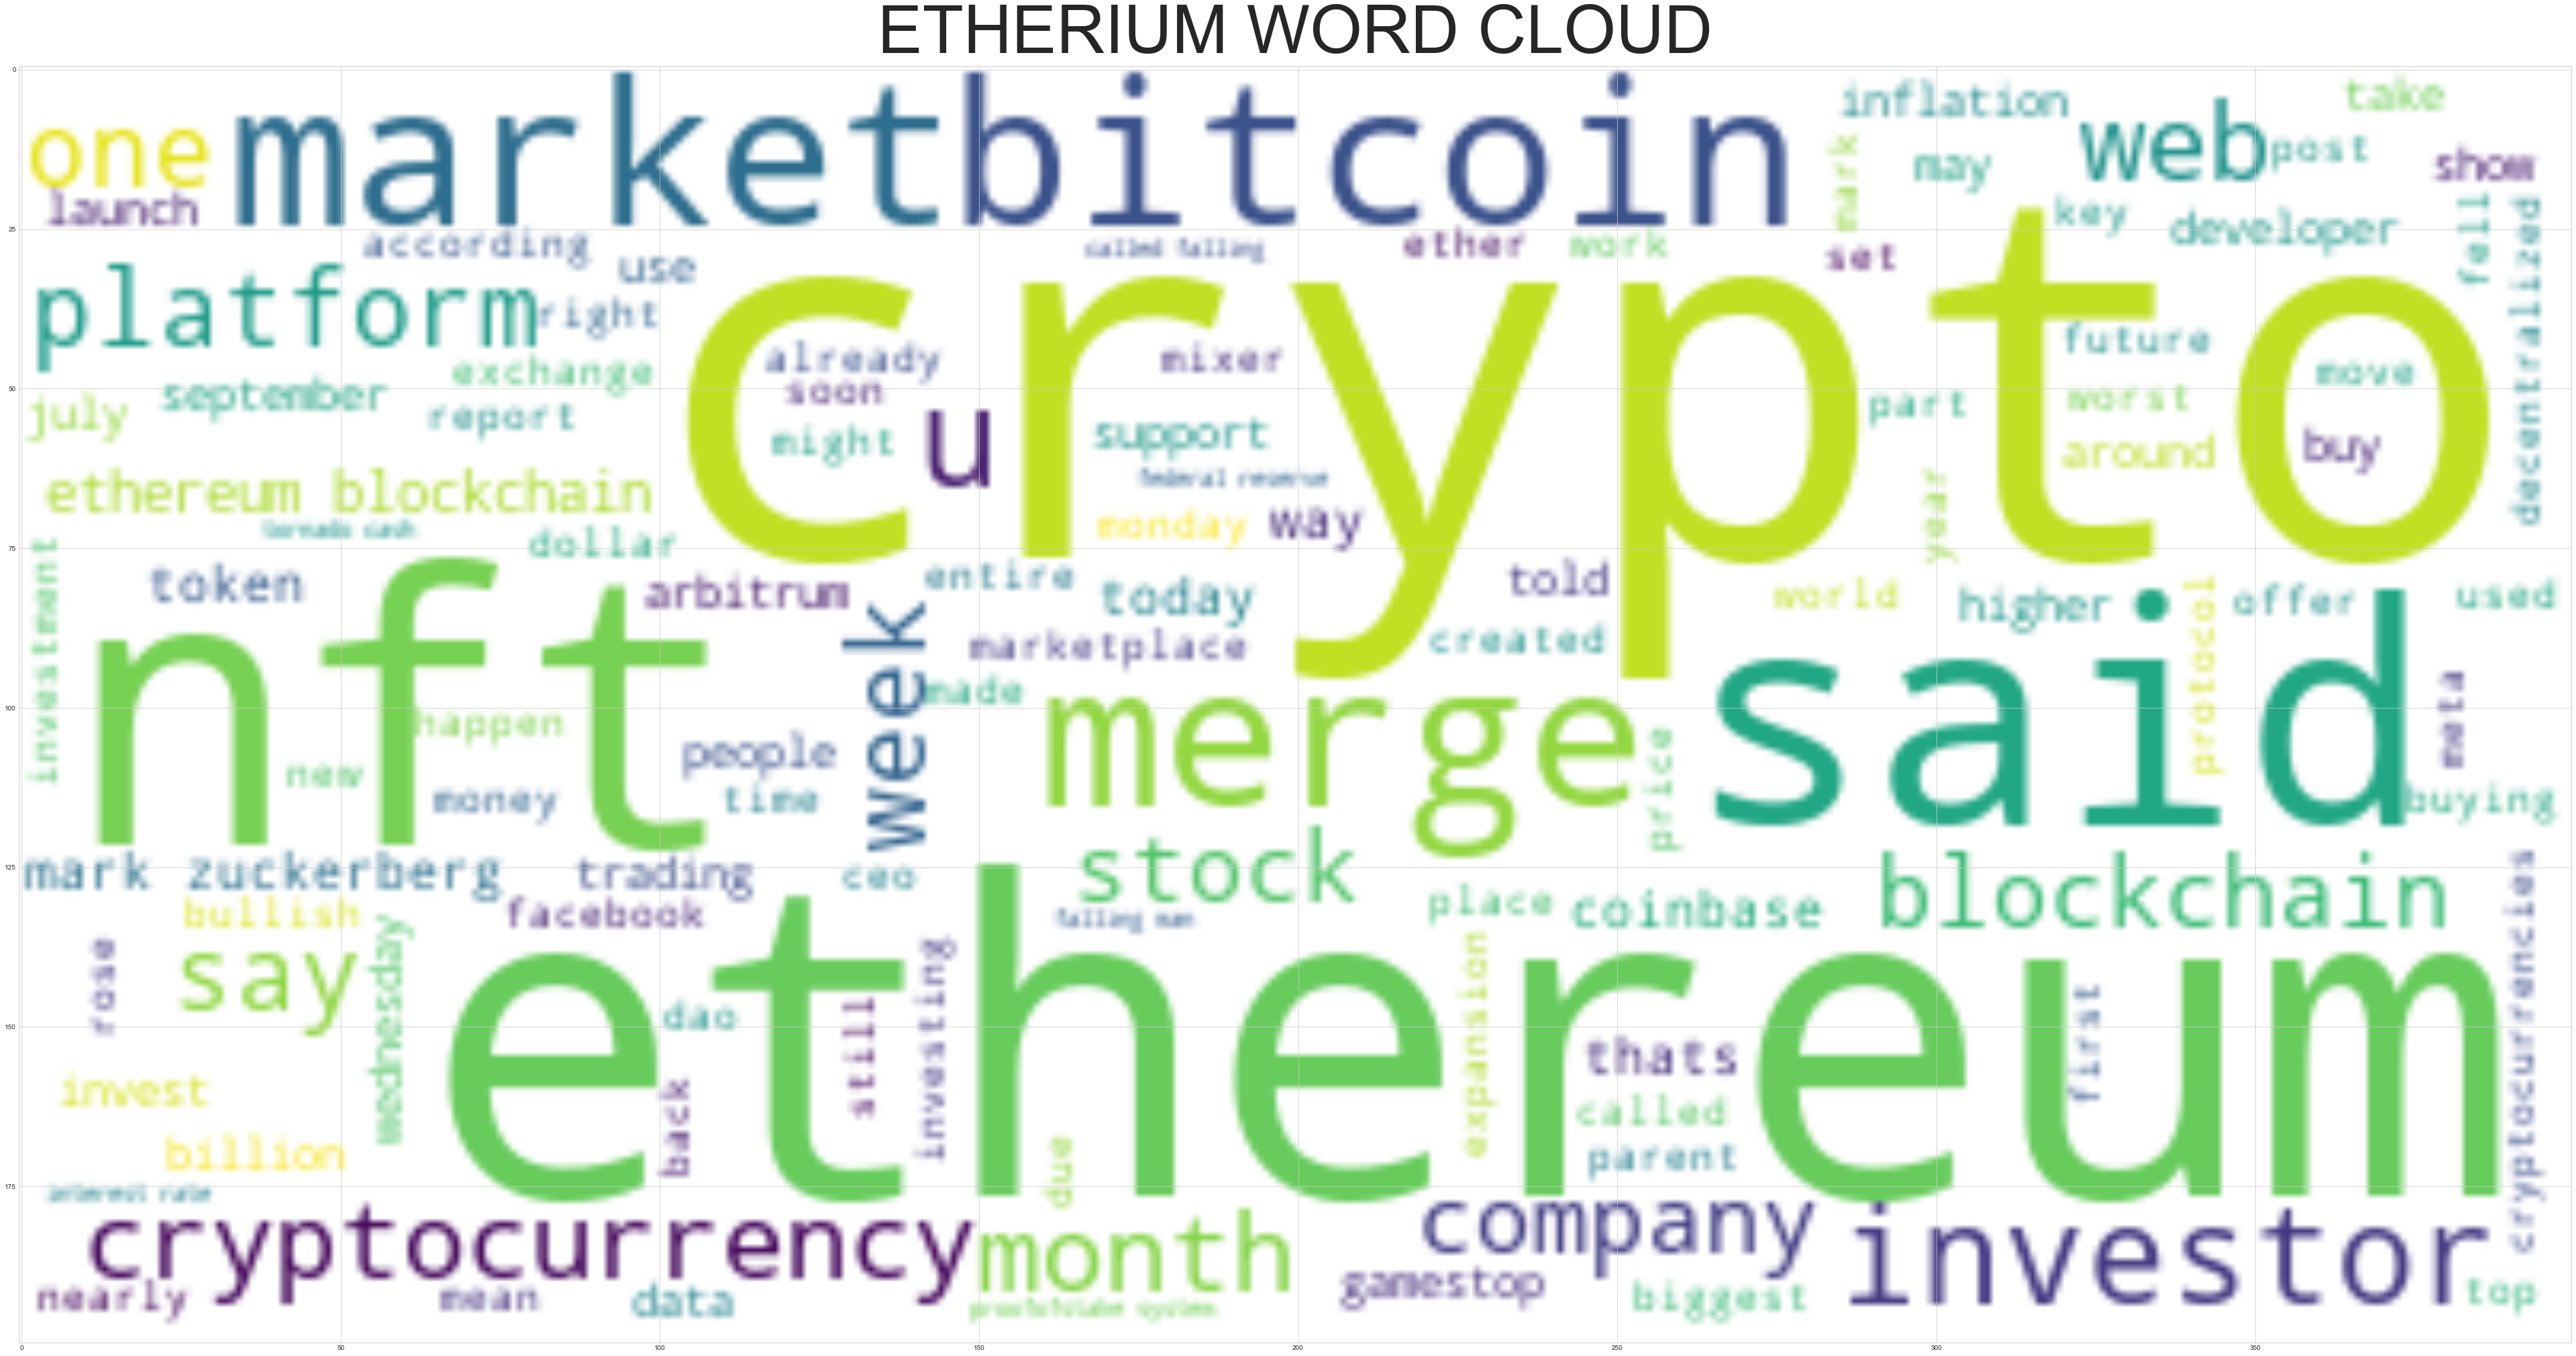

In [23]:
WCloud = WordCloud(background_color="white", max_words=200)
WCloud.generate(eth_corpus)
f = plt.figure(figsize=(150,150))
f.add_subplot(1,2, 2)
plt.imshow(WCloud, interpolation='bilinear')
plt.title("ETHERIUM WORD CLOUD",fontsize=100)
plt.show()

# NAMED ENTITY RECOGNITION


In [24]:
nlp = spacy.load('en_core_web_sm')

In [25]:
btc_concat = df_btc['description'].str.cat(sep=', ')

In [27]:
btc_doc = nlp(btc_concat)
btc_doc.user_data["title"] = "BITCOIN NAMED ENTITY RECOGNITION WORD CLOUD"

displacy.render(btc_doc, style='ent')

In [28]:
pprint([(X.text, X.label_) for X in btc_doc.ents])

[('Compass Mining', 'ORG'),
 ('halcyon days', 'DATE'),
 ('thousands', 'CARDINAL'),
 ('Roman Sterlingov', 'PERSON'),
 ('$336 million', 'MONEY'),
 ('UK', 'GPE'),
 ('nearly a decade', 'DATE'),
 ('One', 'CARDINAL'),
 ('75%', 'PERCENT'),
 ('Bitcoin Holdings', 'ORG'),
 ('Elon Musk', 'PERSON'),
 ('75%', 'PERCENT'),
 ('Bitcoin Holdings', 'ORG'),
 ('Business News', 'ORG'),
 ('World News', 'ORG'),
 ('Bitcoin', 'PERSON'),
 ('6.85%', 'PERCENT'),
 ('22,717.05', 'MONEY'),
 ('22:05 GMT', 'TIME'),
 ('Wednesday', 'DATE'),
 ('1,457.27', 'MONEY'),
 ('Bitcoin', 'PERSON'),
 ('week', 'DATE'),
 ('Kristy Kilburn', 'PERSON'),
 ('2021', 'DATE'),
 ('$1.5 billion', 'MONEY'),
 ('Bitcoin', 'PERSON'),
 ('year', 'DATE'),
 ('roughly 50%', 'PERCENT'),
 ('US', 'GPE'),
 ('Treasury', 'ORG'),
 ('a good month', 'DATE'),
 ('Cryptocurrencies', 'ORG'),
 ('Friday', 'DATE'),
 ('three-week', 'DATE'),
 ('3.36%', 'PERCENT'),
 ('24,584.24', 'MONEY'),
 ('1707', 'DATE'),
 ('GMT', 'ORG'),
 ('Saturday', 'DATE'),
 ('798.93', 'MONEY'),
 (

In [29]:
eth_concat = df_eth['description'].str.cat(sep=', ')

In [ ]:
eth_doc = nlp(eth_concat)
eth_doc.user_data["title"] = "ETHERIUM NAMED ENTITY RECOGNITION WORD CLOUD"

displacy.render(eth_doc, style='ent')

In [ ]:
pprint([(X.text, X.label_) for X in eth_doc.ents])

[('One', 'CARDINAL'),
 ('NFT', 'ORG'),
 ('Instagram', 'ORG'),
 ('May', 'DATE'),
 ('NFT', 'ORG'),
 ('more than 100', 'CARDINAL'),
 ('Africa', 'LOC'),
 ('Asia', 'LOC'),
 ('a day of the week ending', 'DATE'),
 ('The Securities and Exchange Commission', 'ORG'),
 ('11', 'CARDINAL'),
 ('Forsage', 'PERSON'),
 ('Less than two weeks', 'DATE'),
 ('GameStop', 'ORG'),
 ('NFT', 'ORG'),
 ('Falling Man', 'WORK_OF_ART'),
 ('NFT', 'ORG'),
 ('Ethereum', 'ORG'),
 ('over 99%', 'PERCENT'),
 ('Ethereum', 'ORG'),
 ('September', 'DATE'),
 ('the middle of the month', 'DATE'),
 ('100,000', 'CARDINAL'),
 ('second', 'ORDINAL'),
 ('Buterin', 'PERSON'),
 ('Paris', 'GPE'),
 ('Thursday', 'DATE'),
 ('Crypto', 'ORG'),
 ('Zipmex', 'ORG'),
 ('Ethereum', 'PERSON'),
 ('Bitcoin', 'PERSON'),
 ('this week', 'DATE'),
 ('Monday', 'DATE'),
 ('60%', 'PERCENT'),
 ('Wallet', 'PERSON'),
 ('Vivaldi', 'PERSON'),
 ('Jon von Tetzchner', 'PERSON'),
 ('over $1 billion', 'MONEY'),
 ('about 16.6%', 'PERCENT'),
 ('a month ago', 'DATE'),
 ('a